# Synopsis

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
df = pd.read_csv('Supply chain mang.csv')
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
pd.set_option('display.max_columns',50)

In [4]:
df.shape

(25000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Prepruning of Features 

In [6]:
df['Ware_house_ID'].nunique()

25000

In [7]:
df['WH_Manager_ID'].nunique()

25000

In [8]:
df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

# Missing value Treatment

In [10]:
df.isnull().sum()*100/len(df)

Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

# Note

1.Here we can drop the Ware house estimated Feature as there is more than 40% missing data and also because it is not much needed to predict the dependent variable.
2.The Missing values in "approved_wh_govt_certificate" is low, so we can use mode value fill as it is categorical Variable
3.Also the Missing Values is low for "workers_num" so we can use mean value fill as it is numerical variable.

In [11]:
df.drop(['wh_est_year'],axis=1,inplace=True)

In [12]:
df.workers_num.fillna(df.workers_num.mean(),inplace=True)

In [13]:
df.approved_wh_govt_certificate.unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [14]:
df.approved_wh_govt_certificate.fillna(df.approved_wh_govt_certificate.mode(),inplace=True)

# Duplicates Checking

In [15]:
# Always first take a unique value after check duplicates
df.duplicated().sum()

0

# Note

From above analysis, There are no duplicate values

# Feature Engineering

In [16]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [17]:
df['WH_regional_zone']=df['WH_regional_zone'].apply(lambda x:x[-1])

In [18]:
df.WH_regional_zone=pd.to_numeric(df.WH_regional_zone)

# Note:

Here, 'WH_regional_zone' is converted into numerical type by silcing the Zone in it.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  int64  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

# Spliting  data into 2 segments int and object

In [20]:
obj_types_features = df.select_dtypes(include = 'object')
obj_types_features.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [21]:
ob_list = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate']
ob_list

['Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [22]:
df1 = pd.get_dummies(df,columns = ob_list,prefix = ob_list,drop_first = True)

In [23]:
df1.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,0,1


# Note:

All Catergorical variables are converted to numerical type using One-hot encoder

In [24]:
df1.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,0,1


In [25]:
df1.shape

(25000, 27)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

# Correlation Heatmap After doing LabelEncoding

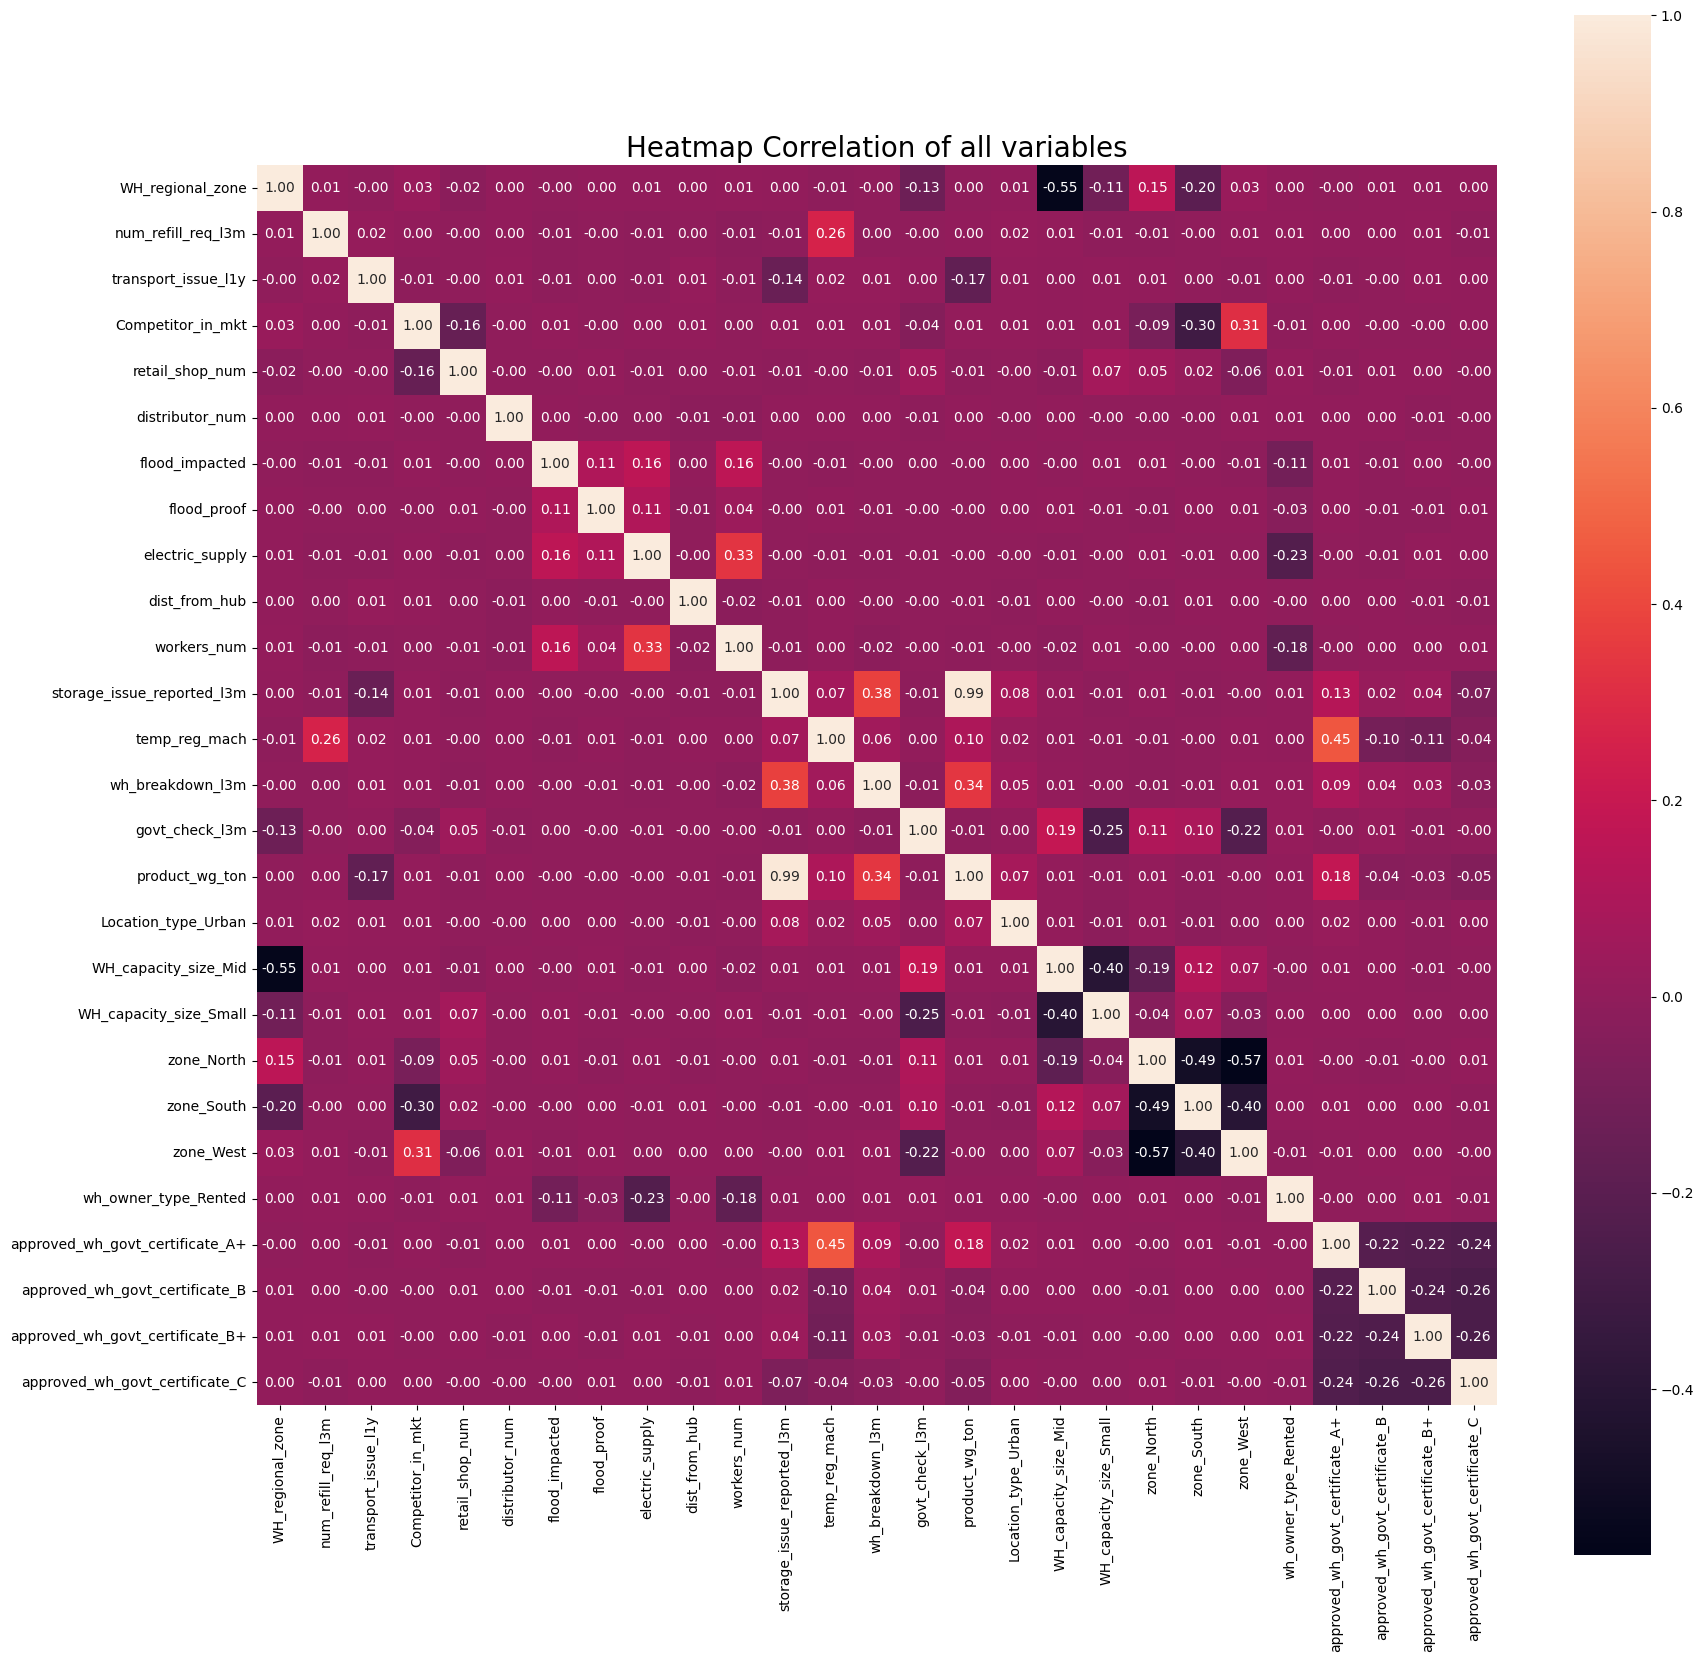

In [27]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df1.corr(),cbar=True,annot=True,square=True,fmt= '.2f',annot_kws={'size':10})
plt.title('Heatmap Correlation of all variables', fontsize = 20, fontweight=100)
plt.show()

# Correlation Heatmap Before doing Label Encoding

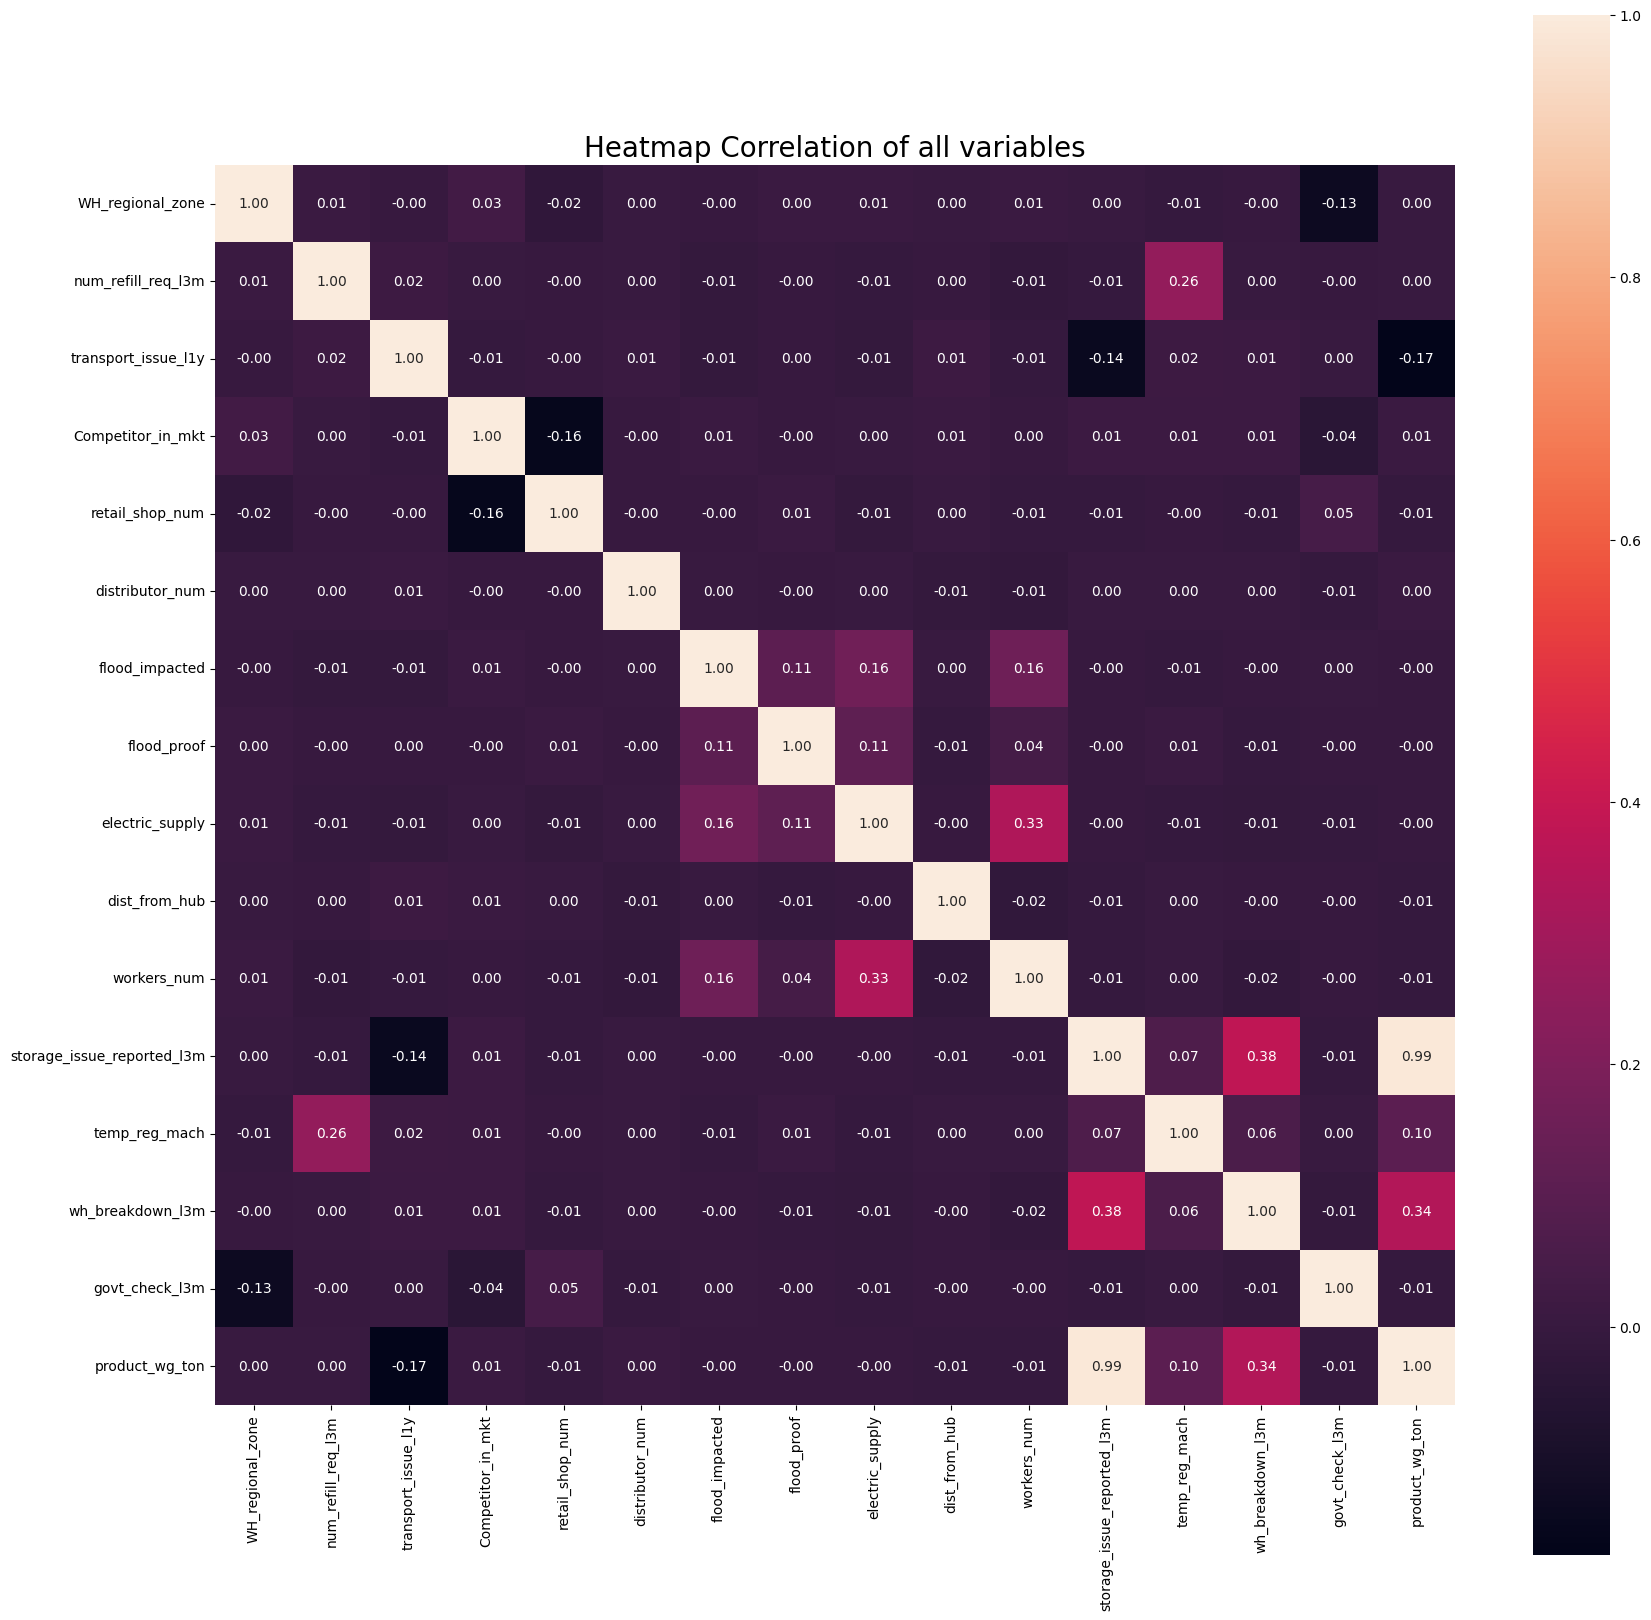

In [28]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Heatmap Correlation of all variables', fontsize = 20,fontweight = 100) # title with fontsize 20
plt.show()

# Note:


From Above Heatmap Correlations it is clear that There is no Independent features highly correlated between eachother.

# Checking Outliers

In [29]:
df1.describe()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.251840,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,17.130440,0.303280,3.482040,18.812280,22102.632920,0.081720,0.40080,0.192440,0.411120,0.254480,0.317240,0.456880,0.167640,0.192480,0.196680,0.220040
std,1.668283,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.715077,9.161108,0.459684,1.690335,8.632382,11607.755077,0.273943,0.49007,0.394225,0.492047,0.435577,0.465411,0.498147,0.373554,0.394256,0.397496,0.414282
min,1.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2065.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13059.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,21.000000,22101.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


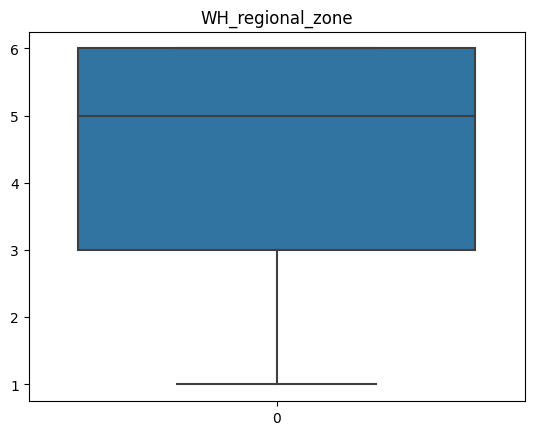

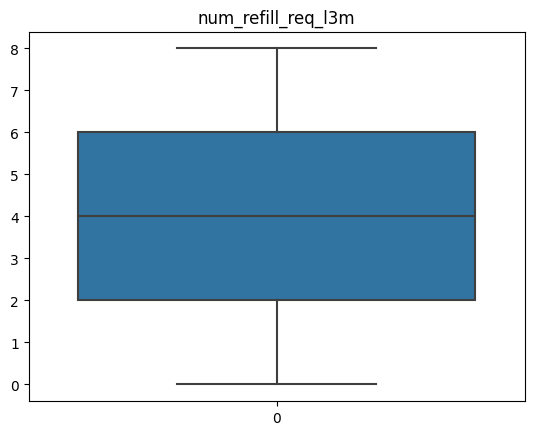

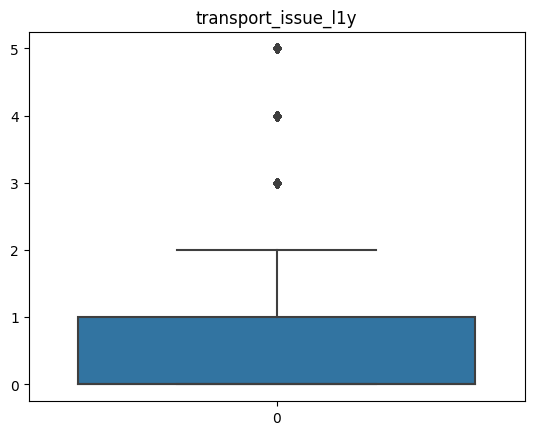

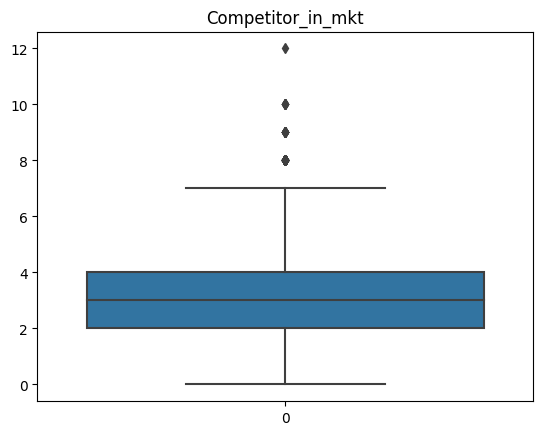

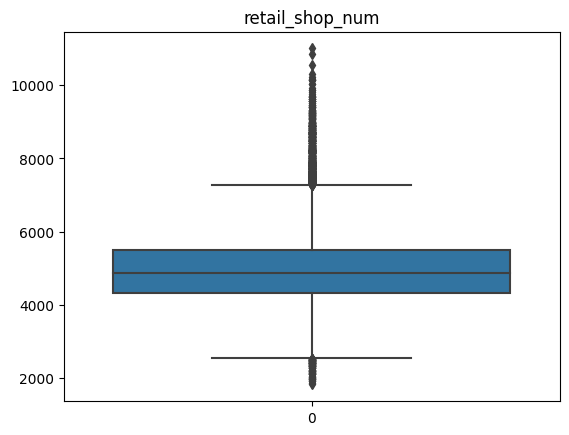

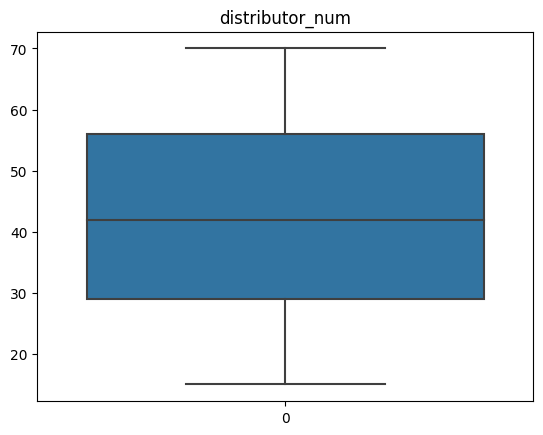

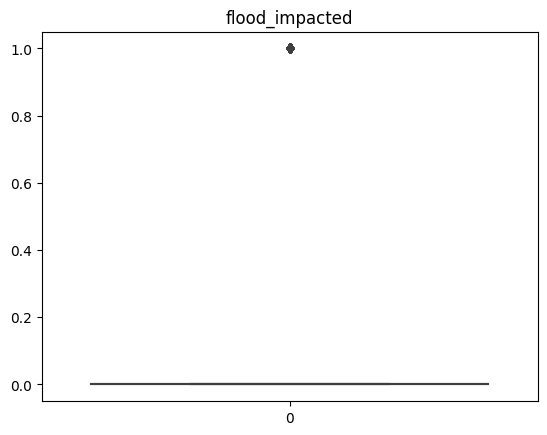

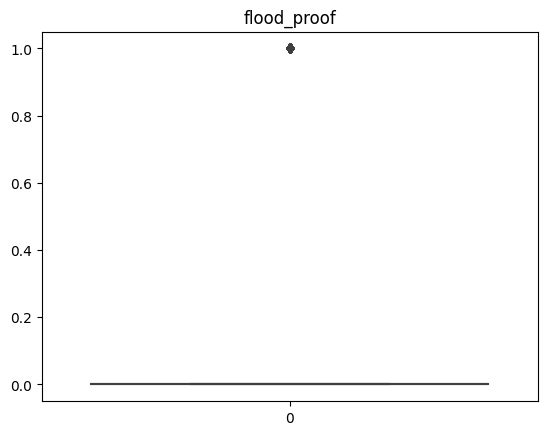

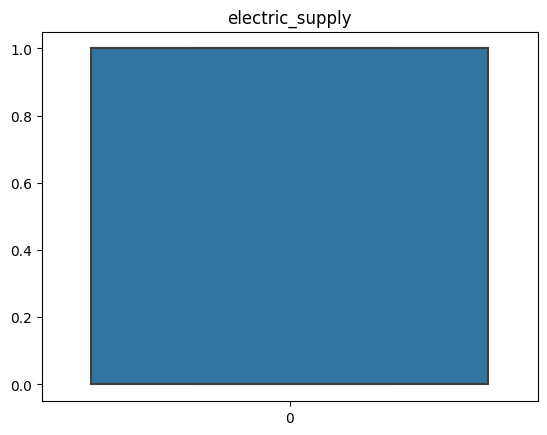

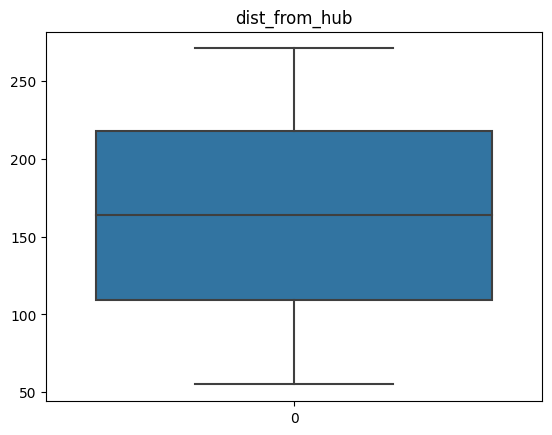

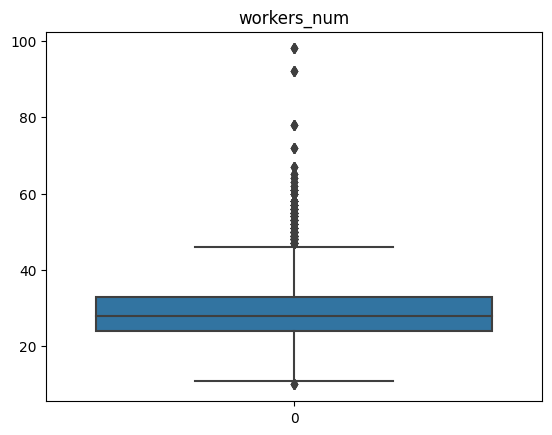

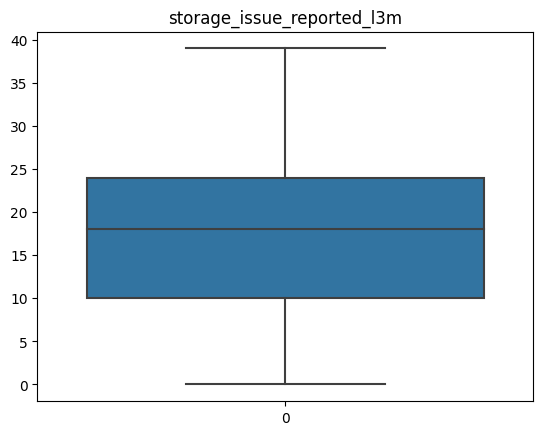

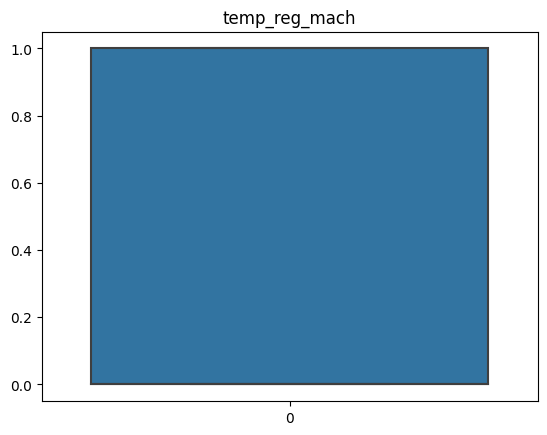

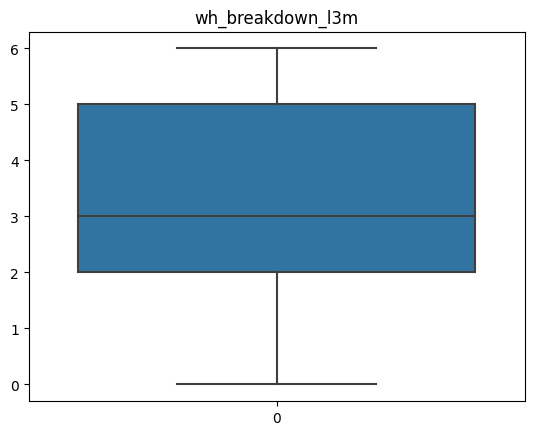

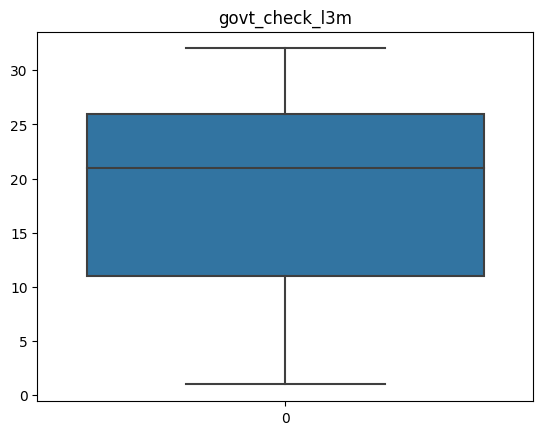

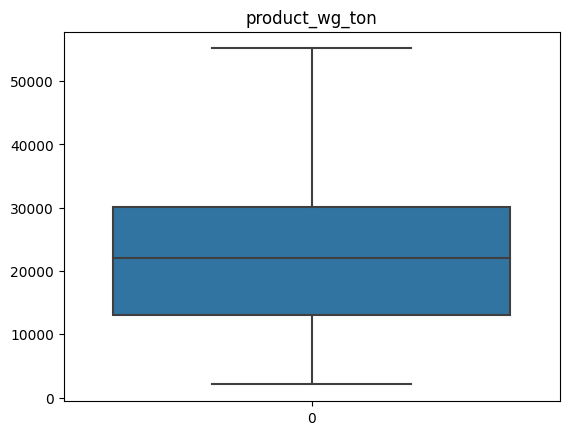

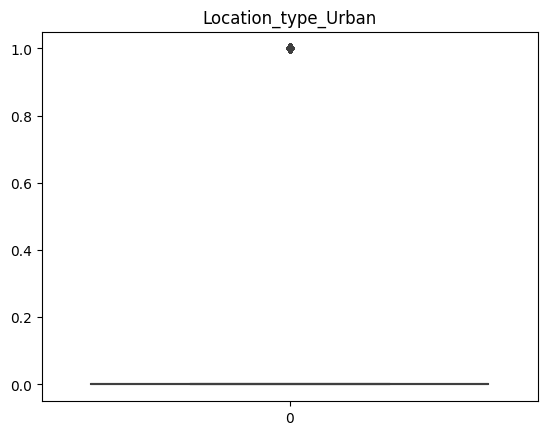

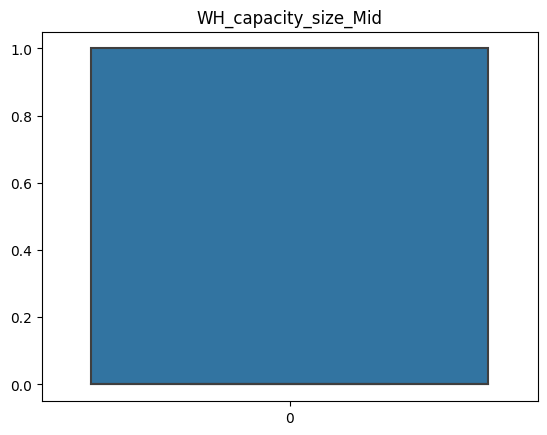

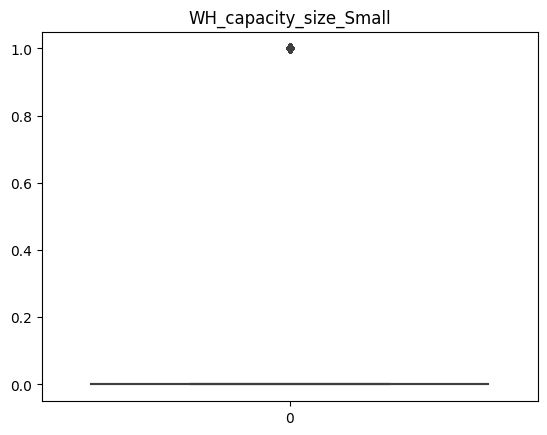

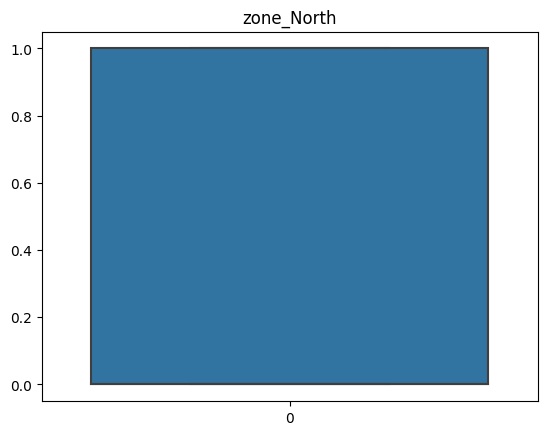

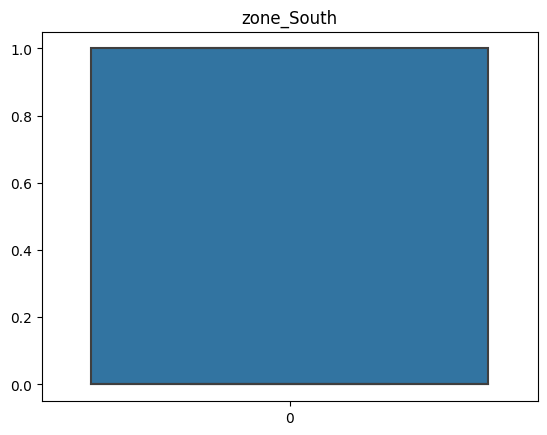

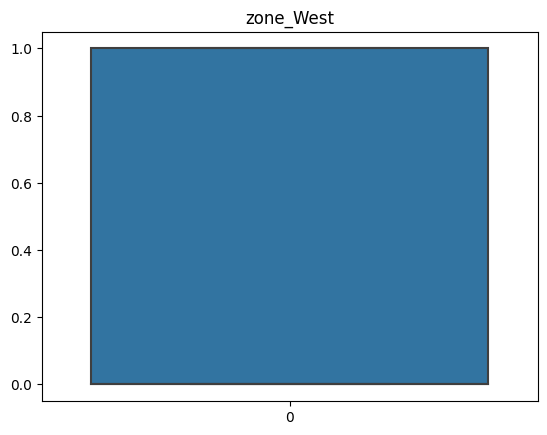

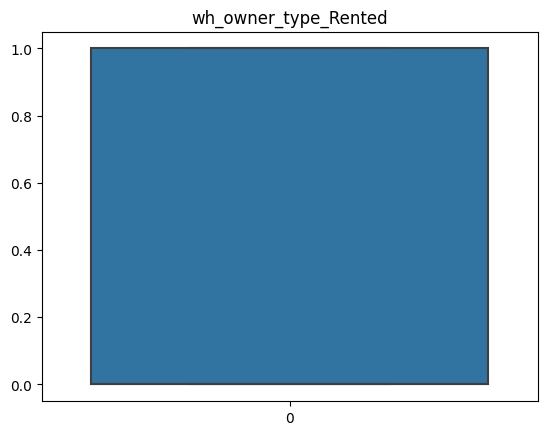

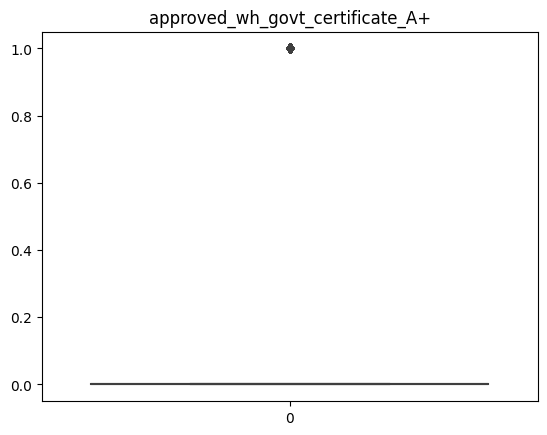

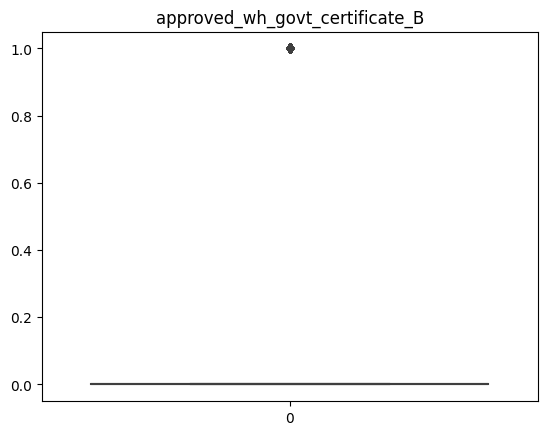

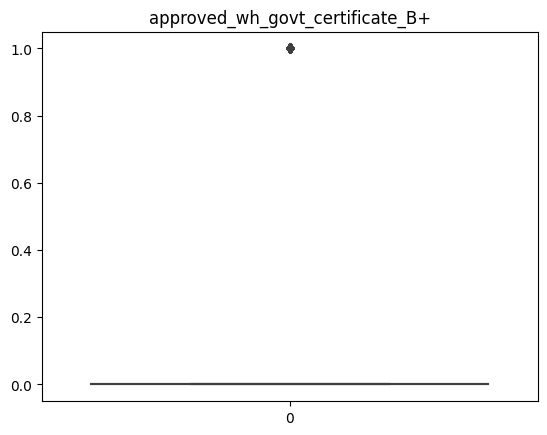

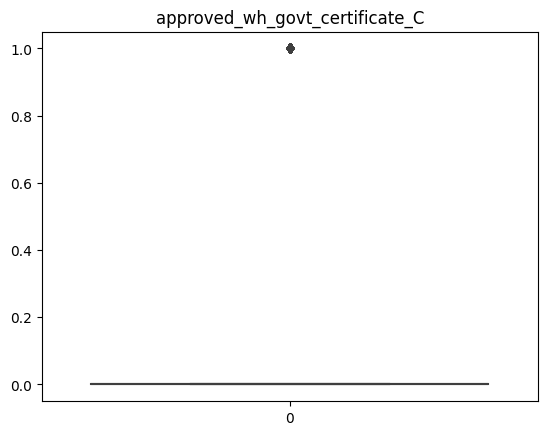

In [30]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.title(i)
    plt.show()

# Note:


From above box plots we are reconfirming that there are no abnormal outliers and all are in ranges. Lets do standard scaling to make the mean value to zero

# EDA of Highly Correlated Variables with the Dependent Variable

Text(0.5, 1.0, 'Storage Issues Vs Production')

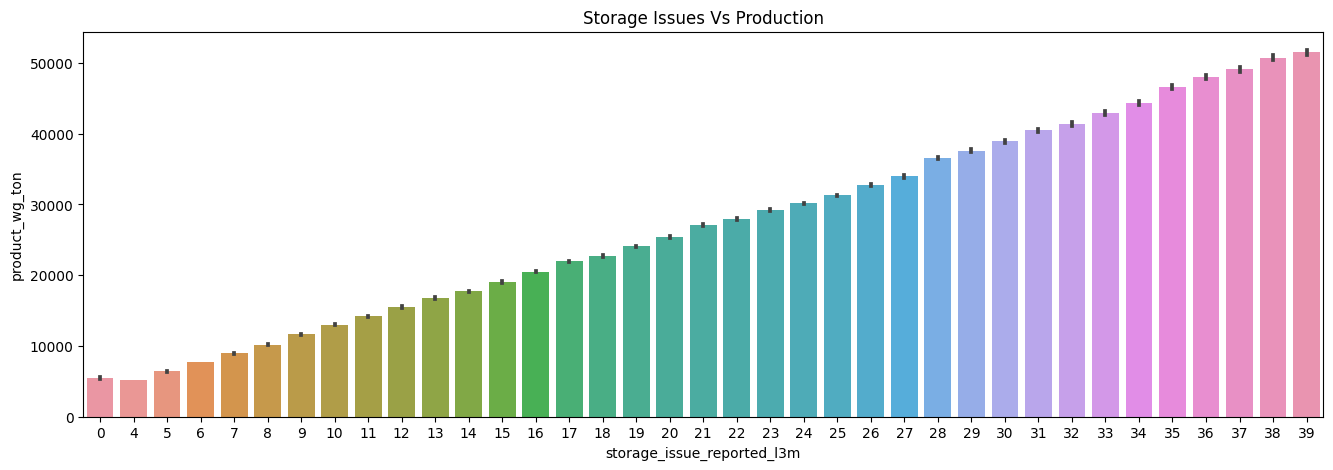

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x = 'storage_issue_reported_l3m', y = 'product_wg_ton',data = df1)
plt.title('Storage Issues Vs Production')

# Note:

From Above Analysis it is clear evident that if there is frequent storage issue reported then there is more production in warehouse

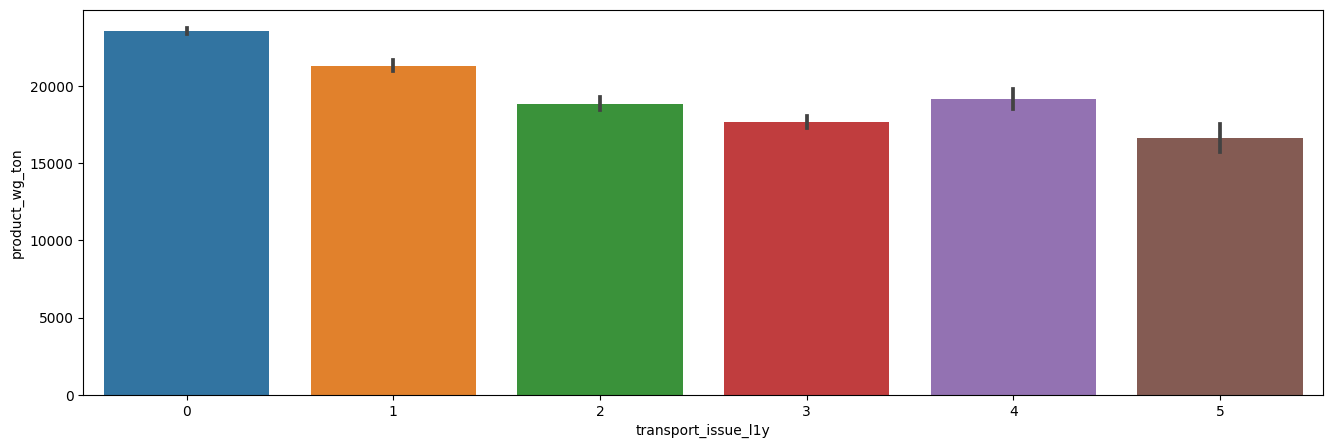

In [32]:
plt.figure(figsize=(16,5))
sns.barplot(x= "transport_issue_l1y",y= "product_wg_ton",data=df1)
plt.show()

# Note:


From Above Analysis it is clear evident that if there is frequent transport issue reported then there is lesser production in warehouse

Text(0.5, 1.0, 'Temperature Regulation Vs Production')

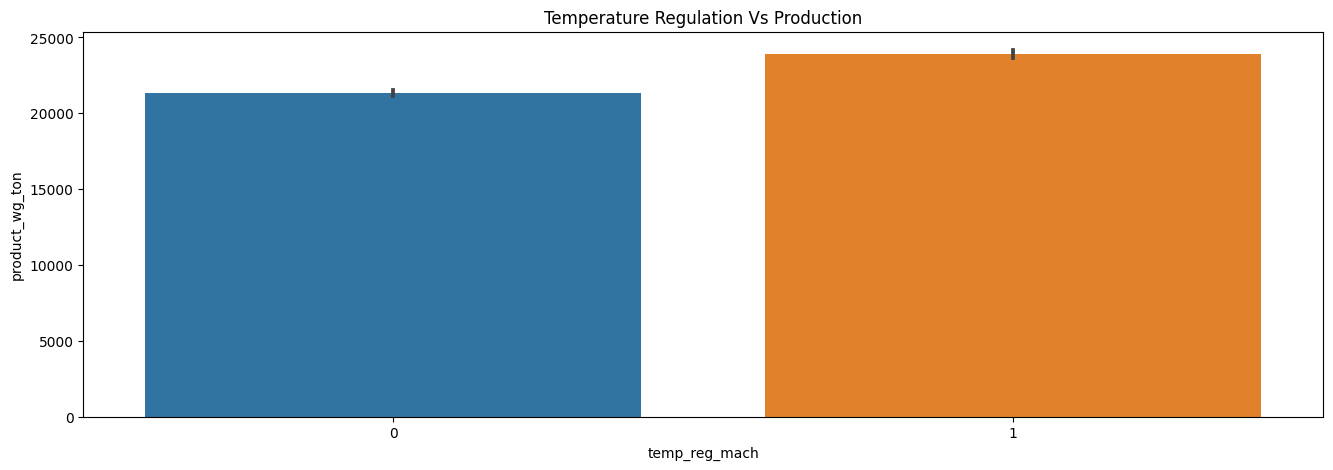

In [33]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'temp_reg_mach', y = 'product_wg_ton',data = df1)
plt.title('Temperature Regulation Vs Production')

# Note:


From Above Analysis it is clear evident that if there is temperature regulating indicator installed then there is more production in warehouse

Text(0.5, 1.0, 'WH Breakdown Vs Production')

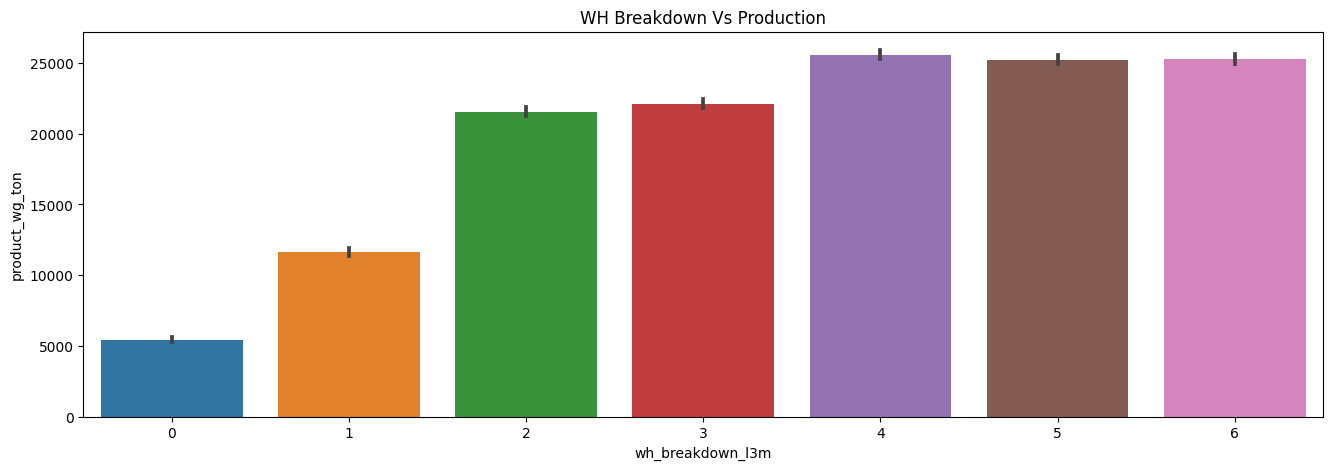

In [34]:
plt.figure(figsize = (16,5))
sns.barplot(x = 'wh_breakdown_l3m', y = 'product_wg_ton',data = df1)
plt.title('WH Breakdown Vs Production')

# Note:


Interestingly if there is warehouse breakdown like worker strike or anyother break down issues it shows the production level of the warehouse is high, this means Whichever ware house is trying to produce more then their breakdown issues are also increased.

# Splitting of Independent and Dependent Variables

In [35]:
x = df1.drop(['product_wg_ton'],axis=True)

In [36]:
x.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,1,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,0,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,0,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,0,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,0,0,0,1,0,0,0,0,0,0,1


In [37]:
y= df1['product_wg_ton']

In [38]:
y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

# Splitting Data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.3,random_state= 101)

# Standardization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [43]:
y_train

9868     28076
1517     36120
10013    24146
13553    52117
19039    35088
         ...  
5695     31151
8006     46126
17745     7149
17931    18088
13151    24133
Name: product_wg_ton, Length: 17500, dtype: int64

# Model Building

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1356.0476
- Mean Absolute Error: 985.4080
- R2 Score: 0.9863
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1363.1373
- Mean Absolute Error: 1002.7705
- R2 Score: 0.9863


Lasso
Model performance for Training set
- Root Mean Squared Error: 1356.0684
- Mean Absolute Error: 984.9964
- R2 Score: 0.9863
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1363.0135
- Mean Absolute Error: 1002.4018
- R2 Score: 0.9863


Ridge
Model performance for Training set
- Root Mean Squared Error: 1356.0478
- Mean Absolute Error: 985.3958
- R2 Score: 0.9863
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1363.1615
- Mean Absolute Error: 1002.7966
- R2 Score: 0.9863


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5348.2125
- Mean Absolute Error: 4239.3913
- R

# Results

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.993683
6,XGBRegressor,0.993334
5,Random Forest Regressor,0.993297
4,Decision Tree,0.987643
1,Lasso,0.986283
0,Linear Regression,0.986280
2,Ridge,0.986280
8,AdaBoost Regressor,0.975932
3,K-Neighbors Regressor,0.678565


# Final Model

In [54]:
cb = CatBoostRegressor(verbose=False)
cb.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = cb.predict(x_train)
y_test_pred = cb.predict(x_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)



print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

print('='*35)
print('\n')

Model performance for Training set
- Root Mean Squared Error: 743.3997
- Mean Absolute Error: 572.8608
- R2 Score: 0.9959
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 924.9662
- Mean Absolute Error: 691.7166
- R2 Score: 0.9937




# Plot of Y_test Actual Vs Y_test Prediction

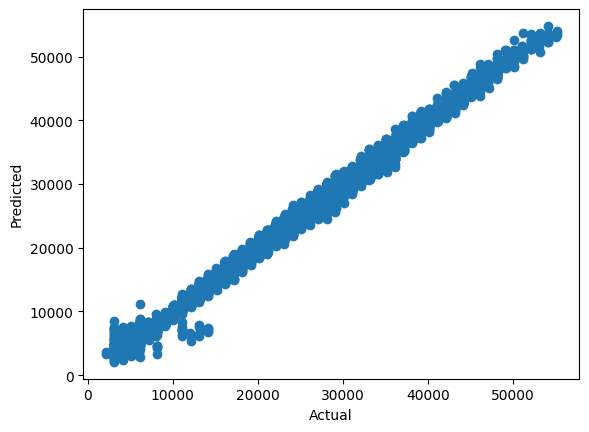

In [55]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Conclusion:

I conclude as Cat Boosting Regressor Algorithm gives the best results as both the Train and Test scores are not much deviating and also the R2 score is best in both Test and Train cases


CatBoosting Regressor Model performance for Training set

* Root Mean Squared Error: 743.0786
* Mean Absolute Error: 573.8416
* R2 Score: 0.9959

# Model performance for Test set

* Root Mean Squared Error: 922.9421
* Mean Absolute Error: 690.1135
* R2 Score: 0.9937